# Класифікація та регресія з використанням навчання без вчителя

Імпортуємо необхідні бібліотеки

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split, cross_val_score

Створимо функцію `visualize_classifier` для візуалізації результатів роботи моделі.

In [2]:
def visualize_classifier(classifier, X, y, mesh_size: int = 100, predict_cmap=plt.cm.gray, edgecolors='black', linewidth=1, train_cmap=plt.cm.Paired):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    delta_x = X[:, 0].max() - X[:, 0].min()
    delta_y = X[:, 1].max() - X[:, 1].min()
    delta_x = 1.0 if delta_x <= 0 else delta_x * 0.1
    delta_y = 1.0 if delta_y <= 0 else delta_y * 0.1
    min_x, max_x = X[:, 0].min() - delta_x, X[:, 0].max() + delta_x
    min_y, max_y = X[:, 1].min() - delta_y, X[:, 1].max() + delta_y
    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.linspace(min_x, max_x, mesh_size), np.linspace(min_y, max_y, mesh_size))
    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    # Reshape the output array
    output = output.reshape(x_vals.shape)
    # Create a plot
    plt.figure()
    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=predict_cmap)
    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors=edgecolors, linewidth=linewidth, cmap=train_cmap)
    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    plt.show()

## Логістична класифікація

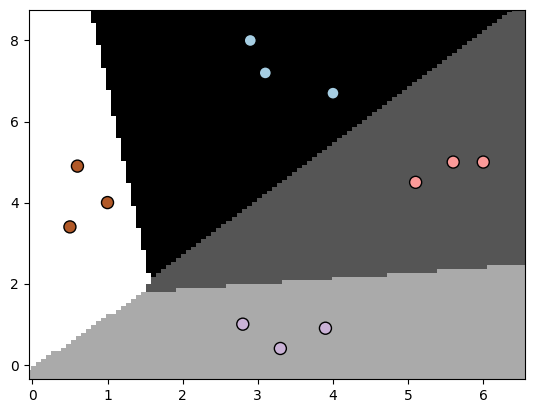

In [3]:
# Define sample input data
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

# Create the logistic regression classifier
classifier = linear_model.LogisticRegression(solver='liblinear', C=1)
#classifier = linear_model.LogisticRegression(solver='liblinear', C=100)

# Train the classifier
classifier.fit(X, y)

# Visualize the performance of the classifier 
visualize_classifier(classifier, X, y)

## Наївний баєсів класифікатор

Точність наївного баєсіва класифікатора = 99.75 %


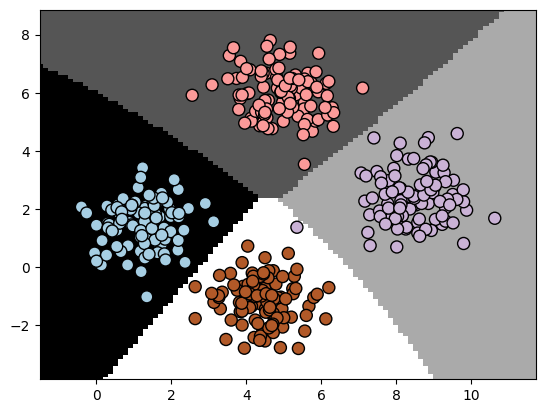

Точність наївного баєсіва класифікатора (test 20%) = 100.0 %


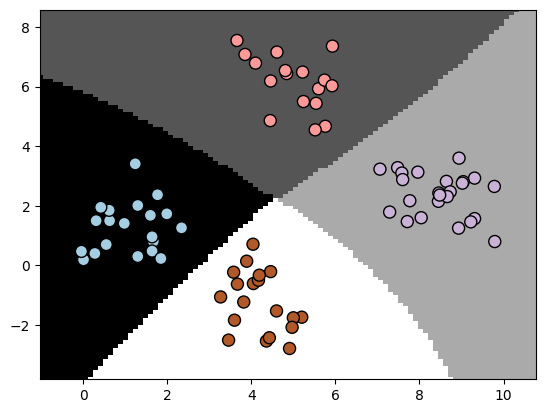

Точність наївного баєсіва класифікатора (train 80%) = 99.69 %


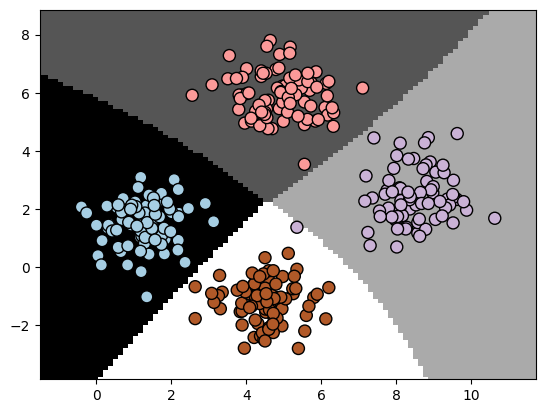

Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%


In [4]:
# Load data from input file
data = np.loadtxt("data/data_multivar_nb.txt", delimiter=',')
X, y = data[:, :-1], data[:, -1] 

# Create Naive Bayes classifier 
classifier = GaussianNB()

# Train the classifier
classifier.fit(X, y)

# Predict the values for training data
y_pred = classifier.predict(X)

# Compute accuracy
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Точність наївного баєсіва класифікатора =", round(accuracy, 2), "%")

# Visualize the performance of the classifier
visualize_classifier(classifier, X, y)

###############################################
# Cross validation 

# Split data into training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test)
# compute accuracy of the classifier
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Точність наївного баєсіва класифікатора (test 20%) =", round(accuracy, 2), "%")
# Visualize the performance of the classifier
visualize_classifier(classifier_new, X_test, y_test)
y_train_pred = classifier_new.predict(X_train)
# compute accuracy of the classifier
accuracy = 100.0 * (y_train == y_train_pred).sum() / X_train.shape[0]
print("Точність наївного баєсіва класифікатора (train 80%) =", round(accuracy, 2), "%")
# Visualize the performance of the classifier
visualize_classifier(classifier_new, X_train, y_train)
###############################################
# Scoring functions

num_folds = 3
accuracy_values = cross_val_score(
    classifier, 
    X, 
    y, 
    scoring='accuracy', 
    cv=num_folds
)
print("Accuracy: " + str(round(100*accuracy_values.mean(), 2)) + "%")

precision_values = cross_val_score(classifier, 
        X, y, scoring='precision_weighted', cv=num_folds)
print("Precision: " + str(round(100*precision_values.mean(), 2)) + "%")

recall_values = cross_val_score(classifier, 
        X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: " + str(round(100*recall_values.mean(), 2)) + "%")

f1_values = cross_val_score(classifier, 
        X, y, scoring='f1_weighted', cv=num_folds)
print("F1: " + str(round(100*f1_values.mean(), 2)) + "%")